# Import liblaries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import preprocessing as pre
from sklearn import cluster
from sklearn import metrics

from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from scipy.cluster.hierarchy import dendrogram
from sklearn.linear_model import LogisticRegression

### load datasets

In [2]:
census_income_test = pd.read_csv("census_income_test.csv")
census_income_test.head()

,38,Private,6,36,1st 2nd 3rd or 4th grade,0,Not in universe,Married-civilian spouse present,Manufacturing-durable goods,Machine operators assmblrs & inspctrs,...,Mexico,Mexico.1,Mexico.2,Foreign born- Not a citizen of U S,0.4,Not in universe.6,2,12,95,- 50000.
0,44,Self-employed-not incorporated,37,12,Associates degree-occup /vocational,0,Not in universe,Married-civilian spouse present,Business and repair services,Professional specialty,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,26,95,- 50000.
1,2,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,95,- 50000.
2,35,Private,29,3,High school graduate,0,Not in universe,Divorced,Transportation,Executive admin and managerial,...,United-States,United-States,United-States,Native- Born in the United States,2,Not in universe,2,52,94,- 50000.
3,49,Private,4,34,High school graduate,0,Not in universe,Divorced,Construction,Precision production craft & repair,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,50,95,- 50000.
4,13,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,Germany,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.


In [3]:
census_income_train = pd.read_csv("census_income_test.csv")
census_income_train.head()

,38,Private,6,36,1st 2nd 3rd or 4th grade,0,Not in universe,Married-civilian spouse present,Manufacturing-durable goods,Machine operators assmblrs & inspctrs,...,Mexico,Mexico.1,Mexico.2,Foreign born- Not a citizen of U S,0.4,Not in universe.6,2,12,95,- 50000.
0,44,Self-employed-not incorporated,37,12,Associates degree-occup /vocational,0,Not in universe,Married-civilian spouse present,Business and repair services,Professional specialty,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,26,95,- 50000.
1,2,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,95,- 50000.
2,35,Private,29,3,High school graduate,0,Not in universe,Divorced,Transportation,Executive admin and managerial,...,United-States,United-States,United-States,Native- Born in the United States,2,Not in universe,2,52,94,- 50000.
3,49,Private,4,34,High school graduate,0,Not in universe,Divorced,Construction,Precision production craft & repair,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,50,95,- 50000.
4,13,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,Germany,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.


### Data cleaning

In [4]:
# check data has missing values 

census_income_test.isnull().sum()

38                                        0
 Private                                  0
 6                                        0
 36                                       0
 1st 2nd 3rd or 4th grade                 0
 0                                        0
 Not in universe                          0
 Married-civilian spouse present          0
 Manufacturing-durable goods              0
 Machine operators assmblrs & inspctrs    0
 White                                    0
 Mexican (Mexicano)                       0
 Female                                   0
 Not in universe.1                        0
 Not in universe.2                        0
 Full-time schedules                      0
 0.1                                      0
 0.2                                      0
 0.3                                      0
 Joint one under 65 & one 65+             0
 Not in universe.3                        0
 Not in universe.4                        0
 Spouse of householder          

In [5]:
census_income_train.isnull().sum()

38                                        0
 Private                                  0
 6                                        0
 36                                       0
 1st 2nd 3rd or 4th grade                 0
 0                                        0
 Not in universe                          0
 Married-civilian spouse present          0
 Manufacturing-durable goods              0
 Machine operators assmblrs & inspctrs    0
 White                                    0
 Mexican (Mexicano)                       0
 Female                                   0
 Not in universe.1                        0
 Not in universe.2                        0
 Full-time schedules                      0
 0.1                                      0
 0.2                                      0
 0.3                                      0
 Joint one under 65 & one 65+             0
 Not in universe.3                        0
 Not in universe.4                        0
 Spouse of householder          

In [6]:
print('shape : ', census_income_train.shape)
census_income_train[census_income_train.duplicated(keep=False)]

census_income_train.shape

shape :  (99761, 42)


(99761, 42)

In [7]:
print('shape : ', census_income_test.shape)
census_income_test[census_income_test.duplicated(keep=False)]

census_income_test.shape

shape :  (99761, 42)


(99761, 42)

In [8]:
# change object columns to int type for train data

object_features = [i for i in census_income_train.columns if census_income_train[i].dtype == 'object']

for i in object_features:
    census_income_train[i] = pre.LabelEncoder().fit_transform(census_income_train[i])
    
census_income_train

,38,Private,6,36,1st 2nd 3rd or 4th grade,0,Not in universe,Married-civilian spouse present,Manufacturing-durable goods,Machine operators assmblrs & inspctrs,...,Mexico,Mexico.1,Mexico.2,Foreign born- Not a citizen of U S,0.4,Not in universe.6,2,12,95,- 50000.
0,44,6,37,12,8,0,2,2,2,10,...,40,40,40,4,0,1,2,26,95,0
1,2,3,0,0,10,0,2,4,14,6,...,40,40,40,4,0,1,0,0,95,0
2,35,4,29,3,12,0,2,0,21,2,...,40,40,40,4,2,1,2,52,94,0
3,49,4,4,34,12,0,2,0,4,8,...,40,40,40,4,0,1,2,50,95,0
4,13,3,0,0,10,0,2,4,14,6,...,11,40,40,4,0,1,0,0,94,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99756,14,3,0,0,10,0,2,4,14,6,...,40,40,40,4,0,1,0,0,95,0
99757,61,4,8,36,1,0,2,5,10,5,...,40,40,40,4,0,1,2,52,95,0
99758,24,6,1,43,5,0,2,2,0,3,...,26,26,26,1,0,1,2,52,94,0
99759,30,4,45,2,9,0,2,2,15,2,...,40,40,40,4,0,1,2,52,95,0


In [9]:
# delete white spaces from columns name

census_income_train.columns = [i.strip() for i in census_income_train.columns]

census_income_train.columns

Index(['38', 'Private', '6', '36', '1st 2nd 3rd or 4th grade', '0',
       'Not in universe', 'Married-civilian spouse present',
       'Manufacturing-durable goods', 'Machine operators assmblrs & inspctrs',
       'White', 'Mexican (Mexicano)', 'Female', 'Not in universe.1',
       'Not in universe.2', 'Full-time schedules', '0.1', '0.2', '0.3',
       'Joint one under 65 & one 65+', 'Not in universe.3',
       'Not in universe.4', 'Spouse of householder', 'Spouse of householder.1',
       '1032.38', '?', '?.1', '?.2', 'Not in universe under 1 year old', '?.3',
       '4', 'Not in universe.5', 'Mexico', 'Mexico.1', 'Mexico.2',
       'Foreign born- Not a citizen of U S', '0.4', 'Not in universe.6', '2',
       '12', '95', '- 50000.'],
      dtype='object')

In [10]:
# change object columns to int type for test data

object_features = [i for i in census_income_test.columns if census_income_test[i].dtype == 'object']

for i in object_features:
    census_income_test[i] = pre.LabelEncoder().fit_transform(census_income_test[i])
    
census_income_test

,38,Private,6,36,1st 2nd 3rd or 4th grade,0,Not in universe,Married-civilian spouse present,Manufacturing-durable goods,Machine operators assmblrs & inspctrs,...,Mexico,Mexico.1,Mexico.2,Foreign born- Not a citizen of U S,0.4,Not in universe.6,2,12,95,- 50000.
0,44,6,37,12,8,0,2,2,2,10,...,40,40,40,4,0,1,2,26,95,0
1,2,3,0,0,10,0,2,4,14,6,...,40,40,40,4,0,1,0,0,95,0
2,35,4,29,3,12,0,2,0,21,2,...,40,40,40,4,2,1,2,52,94,0
3,49,4,4,34,12,0,2,0,4,8,...,40,40,40,4,0,1,2,50,95,0
4,13,3,0,0,10,0,2,4,14,6,...,11,40,40,4,0,1,0,0,94,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99756,14,3,0,0,10,0,2,4,14,6,...,40,40,40,4,0,1,0,0,95,0
99757,61,4,8,36,1,0,2,5,10,5,...,40,40,40,4,0,1,2,52,95,0
99758,24,6,1,43,5,0,2,2,0,3,...,26,26,26,1,0,1,2,52,94,0
99759,30,4,45,2,9,0,2,2,15,2,...,40,40,40,4,0,1,2,52,95,0


In [11]:
# delete white spaces from columns name

census_income_test.columns = [i.strip() for i in census_income_test.columns]

census_income_test.columns

Index(['38', 'Private', '6', '36', '1st 2nd 3rd or 4th grade', '0',
       'Not in universe', 'Married-civilian spouse present',
       'Manufacturing-durable goods', 'Machine operators assmblrs & inspctrs',
       'White', 'Mexican (Mexicano)', 'Female', 'Not in universe.1',
       'Not in universe.2', 'Full-time schedules', '0.1', '0.2', '0.3',
       'Joint one under 65 & one 65+', 'Not in universe.3',
       'Not in universe.4', 'Spouse of householder', 'Spouse of householder.1',
       '1032.38', '?', '?.1', '?.2', 'Not in universe under 1 year old', '?.3',
       '4', 'Not in universe.5', 'Mexico', 'Mexico.1', 'Mexico.2',
       'Foreign born- Not a citizen of U S', '0.4', 'Not in universe.6', '2',
       '12', '95', '- 50000.'],
      dtype='object')

In [12]:
# split train data to X_train and Y_train

X_train = census_income_train.iloc[:,0:41]
X_train.head()

,38,Private,6,36,1st 2nd 3rd or 4th grade,0,Not in universe,Married-civilian spouse present,Manufacturing-durable goods,Machine operators assmblrs & inspctrs,...,Not in universe.5,Mexico,Mexico.1,Mexico.2,Foreign born- Not a citizen of U S,0.4,Not in universe.6,2,12,95
0,44,6,37,12,8,0,2,2,2,10,...,4,40,40,40,4,0,1,2,26,95
1,2,3,0,0,10,0,2,4,14,6,...,0,40,40,40,4,0,1,0,0,95
2,35,4,29,3,12,0,2,0,21,2,...,4,40,40,40,4,2,1,2,52,94
3,49,4,4,34,12,0,2,0,4,8,...,4,40,40,40,4,0,1,2,50,95
4,13,3,0,0,10,0,2,4,14,6,...,0,11,40,40,4,0,1,0,0,94


In [13]:
y_train = census_income_train.iloc[:, -1]
y_train.head()

0    0
1    0
2    0
3    0
4    0
Name: - 50000., dtype: int64

In [14]:
# split test data to X_test and Y_test

X_test = census_income_test.iloc[:,0:41]
X_test.head()

,38,Private,6,36,1st 2nd 3rd or 4th grade,0,Not in universe,Married-civilian spouse present,Manufacturing-durable goods,Machine operators assmblrs & inspctrs,...,Not in universe.5,Mexico,Mexico.1,Mexico.2,Foreign born- Not a citizen of U S,0.4,Not in universe.6,2,12,95
0,44,6,37,12,8,0,2,2,2,10,...,4,40,40,40,4,0,1,2,26,95
1,2,3,0,0,10,0,2,4,14,6,...,0,40,40,40,4,0,1,0,0,95
2,35,4,29,3,12,0,2,0,21,2,...,4,40,40,40,4,2,1,2,52,94
3,49,4,4,34,12,0,2,0,4,8,...,4,40,40,40,4,0,1,2,50,95
4,13,3,0,0,10,0,2,4,14,6,...,0,11,40,40,4,0,1,0,0,94


In [15]:
y_test = census_income_test.iloc[:, -1]
y_test.head()

0    0
1    0
2    0
3    0
4    0
Name: - 50000., dtype: int64

In [16]:
# Building logistic regression model

log_reg = LogisticRegression(max_iter = 100000).fit(X_train, y_train)

prediction = log_reg.predict(X_test)

print('Accuracy score : ', metrics.accuracy_score(y_test, prediction))

Accuracy score :  0.9476849670713005


Feature: 38, Score: 0.033968251320036794
Feature: Private, Score: 0.022534249555444006
Feature: 6, Score: 0.004937657854145824
Feature: 36, Score: -0.05840364923323786
Feature: 1st 2nd 3rd or 4th grade, Score: 0.03443588715257534
Feature: 0, Score: -5.0274373962177536e-05
Feature: Not in universe, Score: 0.21836720649338817
Feature: Married-civilian spouse present, Score: -0.036150722867274554
Feature: Manufacturing-durable goods, Score: -0.020835577433728242
Feature: Machine operators assmblrs & inspctrs, Score: 0.040970149172192945
Feature: White, Score: 0.11399193319456717
Feature: Mexican (Mexicano), Score: -0.06882500452807017
Feature: Female, Score: 1.4770815574394995
Feature: Not in universe.1, Score: 0.06827528769497965
Feature: Not in universe.2, Score: 0.014012671637791678
Feature: Full-time schedules, Score: 0.011454877248298733
Feature: 0.1, Score: 0.00013435171810530292
Feature: 0.2, Score: 0.0006806983520939898
Feature: 0.3, Score: 0.00022611654121474034
Feature: Joint on

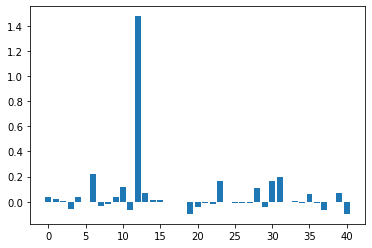

In [17]:
# get importance
importance = log_reg.coef_

# summarize feature importance
for i,v in zip(X_train.columns, importance[0]):
    print('Feature: {}, Score: {}'.format(i,v))
    

# plot feature importance
plt.bar([x for x in range(len(importance[0]))], importance[0])
plt.show()

In [18]:
# Using PCA to transform X_train

pca = PCA(n_components=2)
pca = pca.fit(X_train)
X_train_pca = pca.transform(X_train)

X_train_pca

array([[-304.72270323, 2326.70130115],
       [-435.58077888, -169.9798827 ],
       [-435.04960735, -170.15552572],
       ...,
       [-434.65651014, -170.3592482 ],
       [-435.3928602 , -169.9971704 ],
       [-435.59960927, -169.87815681]])

In [19]:
clu = cluster.KMeans(n_clusters=3)
clu = clu.fit(X_train_pca)
y_pred = clu.predict(X_train_pca)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

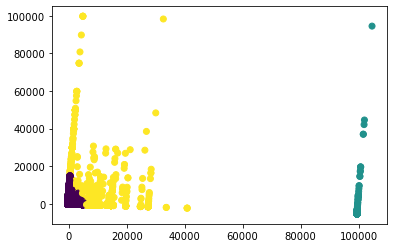

In [21]:
# visualize the clusters and color by predicted clusters
plt.scatter(X_train_pca[:,0], X_train_pca[:,1], c=y_pred)

In [22]:
# visualize the clusters and color by actual clusters labels
plt.scatter(X_pca[:,0], X_pca[:,1], c=y)
plt.legend();

NameError: name 'X_pca' is not defined

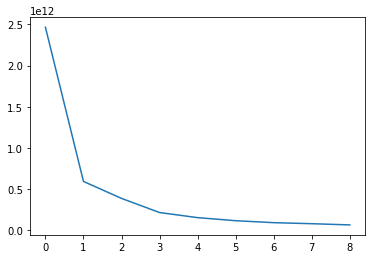

In [24]:
# hyperparameter tunning

n_clusters = list(range(1, 10))
within_cluster_var = []
for i in n_clusters:
    clu = cluster.KMeans(n_clusters=i)
    clu = clu.fit(X_train_pca)
    within_cluster_var.append(clu.inertia_)

plt.plot(within_cluster_var)

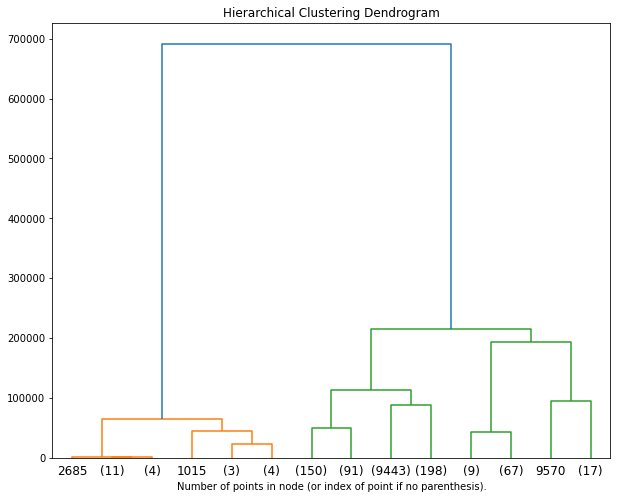

In [25]:

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)



# setting distance_threshold=0 ensures we compute the full tree.
model = cluster.AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(X_train_pca[:10000, :])

plt.figure(figsize = (10, 8))
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram

plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()
